In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

## Read file

In [21]:
with open("../data/imt.txt", "r") as f:
    column_names = f.readline().replace("\n","").split(" ")
    lines = f.readlines()
    lines = [line.replace("\n","") for line in lines]

data = []
column_names.pop(0)

for line in lines:
    temp = line.split(" ")
    temp.pop(0)
    temp = list(map(float, temp))

    data.append(temp)

df = pd.DataFrame(data, columns=column_names)
df.shape




(100, 6)

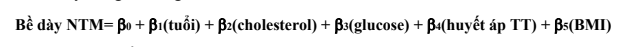

In [20]:
X = df.drop(columns=["IPM"])
Y = df["IPM"]

regressor = linear_model.LinearRegression(fit_intercept=True)

regressor.fit(X, Y)
age, bmi, bp, glu, chol = regressor.coef_
intercept = regressor.intercept_

=> ipm = intercept + age*x1 + chol*x2 + glu*x3 + bp*x4 + bmi*x5

- split

In [25]:
training = df[0:80]
testing = df[80:df.shape[0]]

In [29]:
X2 = training.drop(columns=["IPM"])
Y2 = training["IPM"]

X_test = testing.drop(columns=["IPM"])
Y_test = testing["IPM"]

regressor.fit(X2, Y2)

age, bmi, bp, glu, chol = regressor.coef_
intercept = regressor.intercept_

y_pred = regressor.predict(X_test)

errors = y_pred - Y_test
mean_error = np.mean(np.abs(y_pred - Y_test))

var_error = sum((errors - mean_error)**2)/errors.shape[0]

print(mean_error)
print(var_error)


0.30532598337436595
0.36947015406502115
